<a href="https://colab.research.google.com/github/JakeANam/AIstudy24/blob/master/%EA%B5%B0%EC%A7%91_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 사진이나 동영상 등은 용량이 커서 보관하기 힘들기 때문에 주성분만 분석해서 갖고 있으면 디스크용량 등에 이로움이 있다(차원축소 알고리즘)
# 데이터가 가진 속성을 특성이라고 한다(RGBK-A -> 적녹청,흑백명암-필터)
# 비훈련학습에서 사용한 과일 사진은 10,000pixel이었기 때문에 10,000개의 특성이 있다

# 특성이 많으면 선형 model의 성능이 높아지고 훈련 data에 쉽게 과대적합된다
# 차원 축소: data를 가장 잘 나타내는 일부 특성을 선택하여 data크기를 줄이고 지도학습 model의 성능을 향상시키기 위함

# 주성분 분석(PCA (Principal Component Analysis)): 줄여준 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원할 수도 있어야 한다.
# https://ddongwon.tistory.com/114

# 주성분 분석은 data에 있는 분산(data가 널리 퍼져있는 정도)이 큰 방향을 찾는 것으로 이해하자
# -> data를 잘 표현하는 vector

!wget https://bit.ly/fruits_300_data -O fruits_300.npy
# 설치하면 파일탭(content)에서 확인해보자!

--2025-01-08 05:50:57--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-01-08 05:50:58--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-01-08 05:50:58--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... con

In [ ]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

from sklearn.decomposition import PCA
pca = PCA(n_components=50) # 주성분 개수로 50으로 지정
pca.fit(fruits_2d) # 이것도 target값 X

PCA(n_components=50)

In [ ]:
print(pca.components_.shape)
# 50개의 속성에 10,000개의 특성개수

(50, 10000)


In [ ]:
import matplotlib.pyplot as plt

# 배열 값을 이용해서 image로 출력하기 위한 method
def draw_fruits(arr, ratio=1): # ratio: 비율
  n = len(arr) # sample 개수
  rows = int(np.ceil(n/10)) # 한 줄에 10개씩 image 생성하기 위해 10으로 나눠두기
  cols = n if rows < 2 else 10 # 행이 1개면 열의 개수는 sample개수, 그렇지 않으면 10개
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n: axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
      axs[i, j].axis('off')

  plt.show()

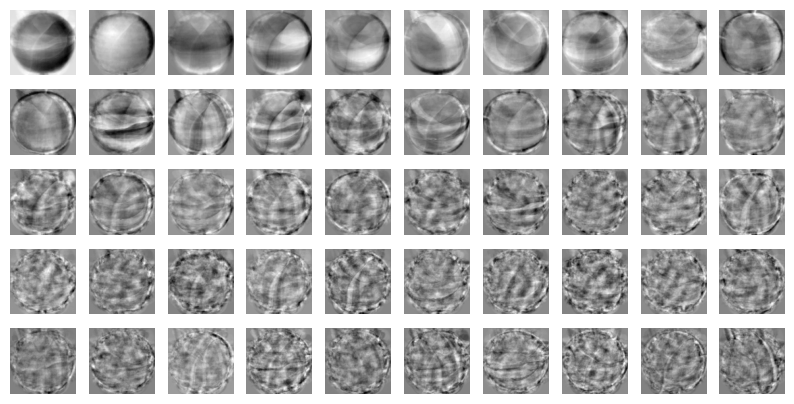

In [ ]:
draw_fruits(pca.components_.reshape(-1, 100, 100))
# 주성분은 원본 data를 투영하여 특성의 개수를 만들어낸다
# 이 주 성분은 원본 data에서 가장 분산이 큰 방향을 순서대로 나타낸 것

In [ ]:
# 이제 원본data를 주성분에 투영해서 특성의 개수를 10,000개에서 50개로 줄일 수 있다 -> 원본의 분해
# transform() 을 사용해서 원본 data의 차원을 줄여본다
fruits_pca = pca.transform(fruits_2d)
print(fruits_2d.shape)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


In [ ]:
# 10,000개의 특성을 50개로 줄였으니 어느 정도 손실이 발생할 수 있다.
# 하지만 최대한 분산이 큰 방향으로 data를 투영했기 때문에 원본 data를 상당부분 재구성이 가능하다
# 원본 data의 재구성 -> inverse_transform()
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse)

[[1.0565608  1.05468696 1.06864186 ... 1.         1.         1.        ]
 [1.03399367 0.99967558 1.03445177 ... 1.         1.         1.        ]
 [1.05770929 1.05719891 1.07187647 ... 1.         1.         1.        ]
 ...
 [0.9689318  0.90168744 0.92239069 ... 1.         1.         1.        ]
 [0.63148973 0.93440526 0.7571394  ... 1.         1.         1.        ]
 [0.99399609 0.9498009  0.96618687 ... 1.         1.         1.        ]]


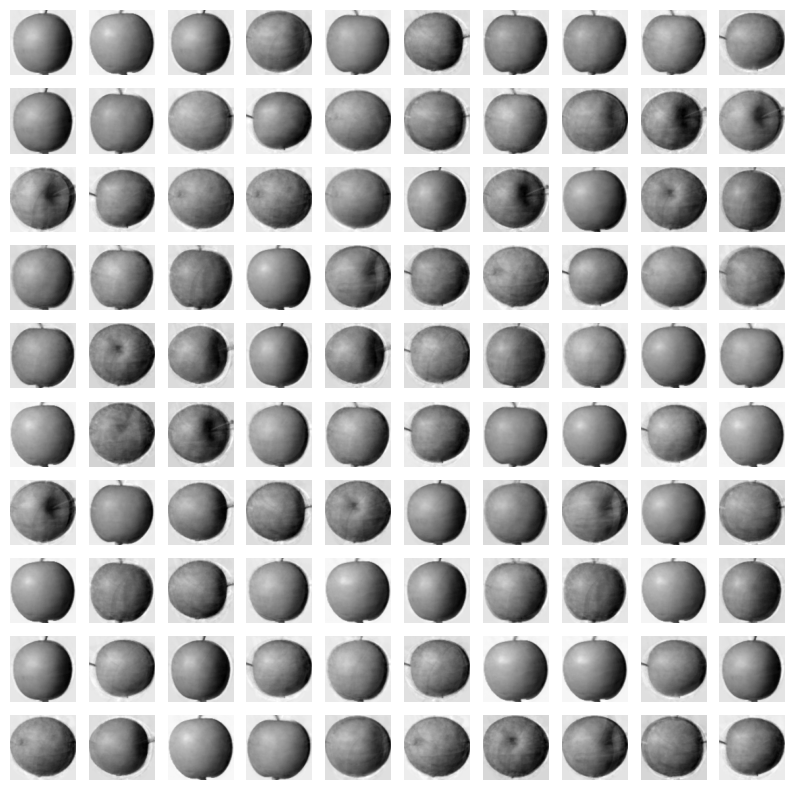

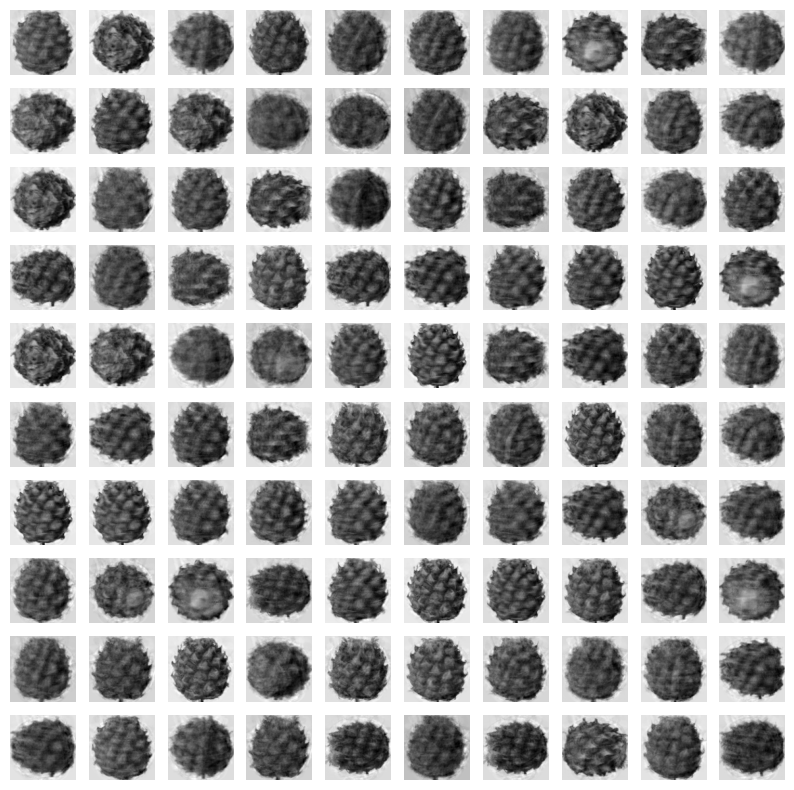

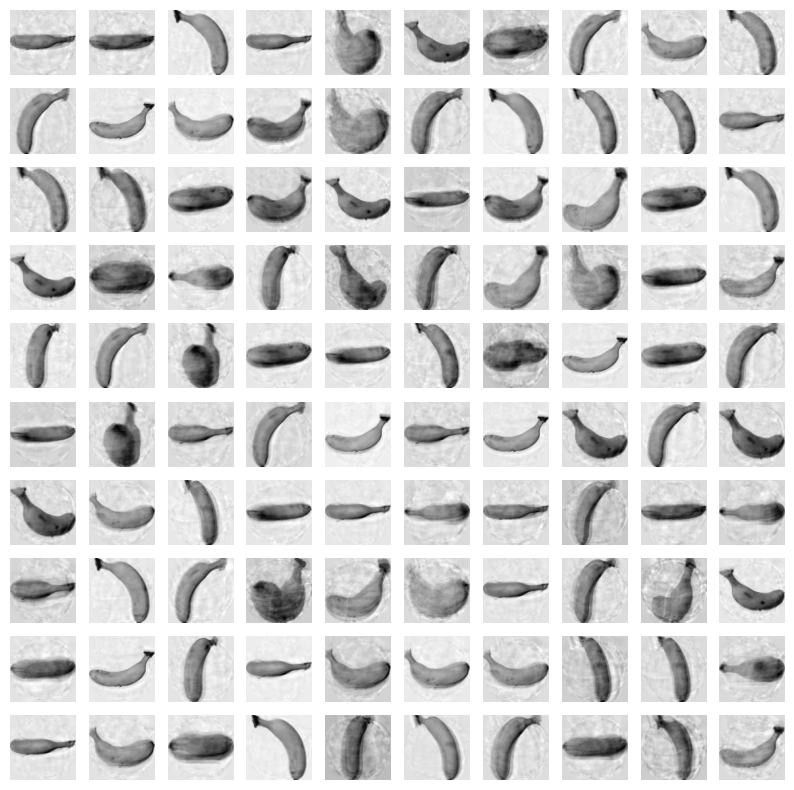

In [ ]:

fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

In [ ]:
# 거의 모든 file이 잘 복원 된 듯 하다 - 흐리고 번진 부분도 있지만 중요한 특성은 아님
# 만약 주 성분을 최대로 사용했다면 완벽하게 원본 데이터를 재구성 할 수 있을 것이다
# 50개의 특성은 얼마나 분산을 보존하고 있을까?

# 설명된 분산(explained variance): 주성분이 원본 data의 분산을 얼마나 잘 나타내는 지 기록한 값
# PCAclass의 explained variance_ratio에 주성분의 설명된 분산 비율이ㅐ 기록되어 있음

# 첫번째 주성분의 설명된 분산이 가장 크다
# 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율
print(np.sum(pca.explained_variance_ratio_)) # 이 비율은 곧 이미지 품질을 의미하기도 한다

0.921547128469511


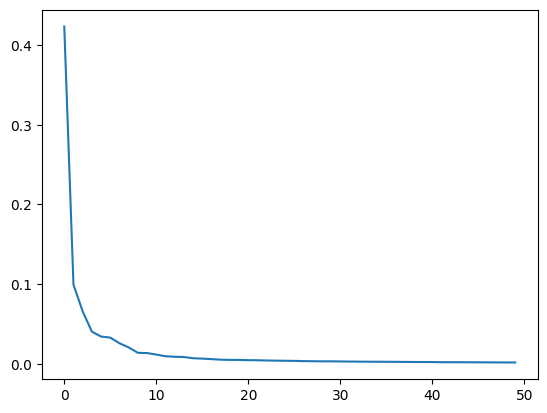

In [ ]:
plt.plot(pca.explained_variance_ratio_)
# graph에서 처음 10개가 주성분의 대부분을 표현하고 있다

In [ ]:
# 위에서 만든 주성분으로 지도학습 모델에 적용해보자
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [ ]:
# 지도학습에 사용할 target 생성
target = np.array([0]*100 + [1]*100 + [2]*100)
# python list에 정수를 곱하면 list안의 원소를 정수만큼 반복해서 각각 100개씩 있는 target 생성
print(len(target))

300


In [ ]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target) # 원본 data 사용
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
# 특성이 10,000개이기 때문에 300개의 sample에서는 과대적합(99%) 발생

0.9966666666666667
1.9241804122924804


In [ ]:
scores = cross_validate(lr, fruits_pca, target) # 축소 data사용
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
# 속도가 빠르고 용량도 적다 - 처리 시간이 원본보다 1.3초 이상 줄어들었다
# PCA로 훈련 data의 차원을 축소하면 저장 공간과 시간을 절약할 수 있다

0.9966666666666667
0.024985218048095705


In [ ]:
# 앞에서는 PCA class를 사용할 때 n_components 매개변수에 주성분 개수를 50개로 진행해봤다

# 이 대신 비율로 줄 수도 있다
pca = PCA(n_components=0.5) # 50% 비율로 설정해서 줄이기
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [ ]:
print(pca.n_components_)
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

2
(300, 2)


In [ ]:
scores = cross_validate(lr, fruits_pca, target) # 축소 data사용
print(np.mean(scores['test_score'])) # 99% 과대적합
print(np.mean(scores['fit_time'])) # 약간의 시간 증가

0.9933333333333334
0.03015303611755371


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

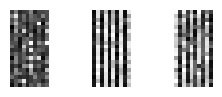

In [ ]:
draw_fruits(fruits_pca.reshape(-1,20,10))

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)


KMeans(n_clusters=3, random_state=42)

In [ ]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


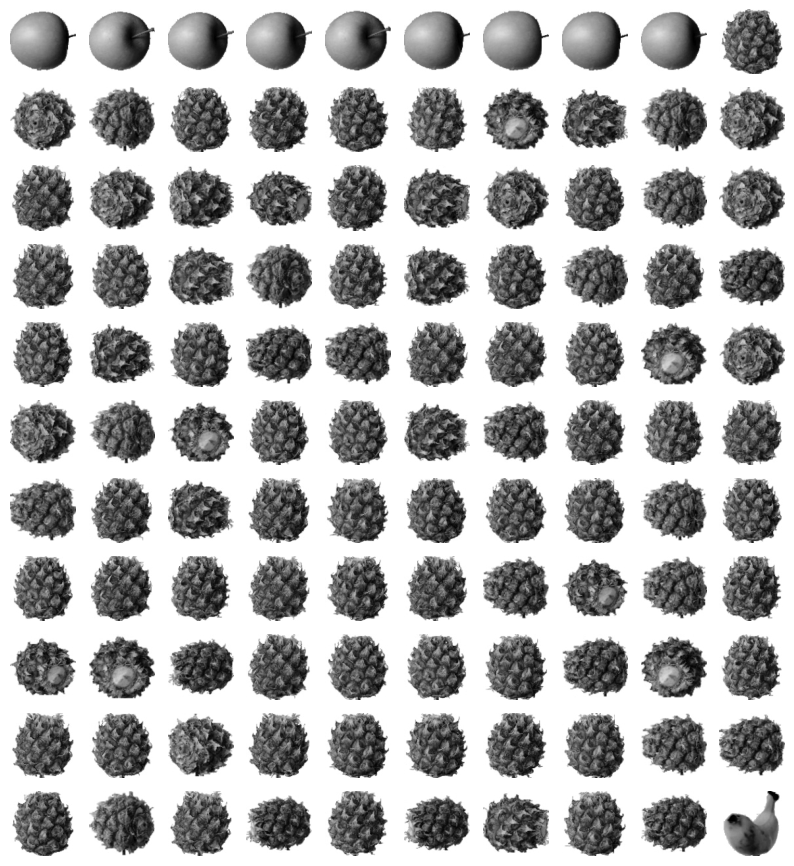

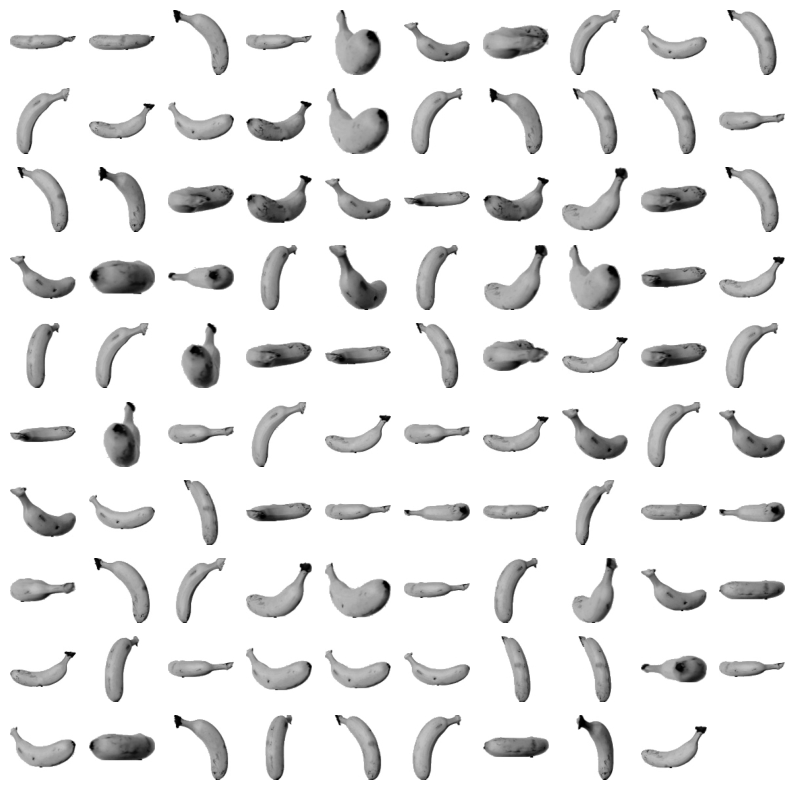

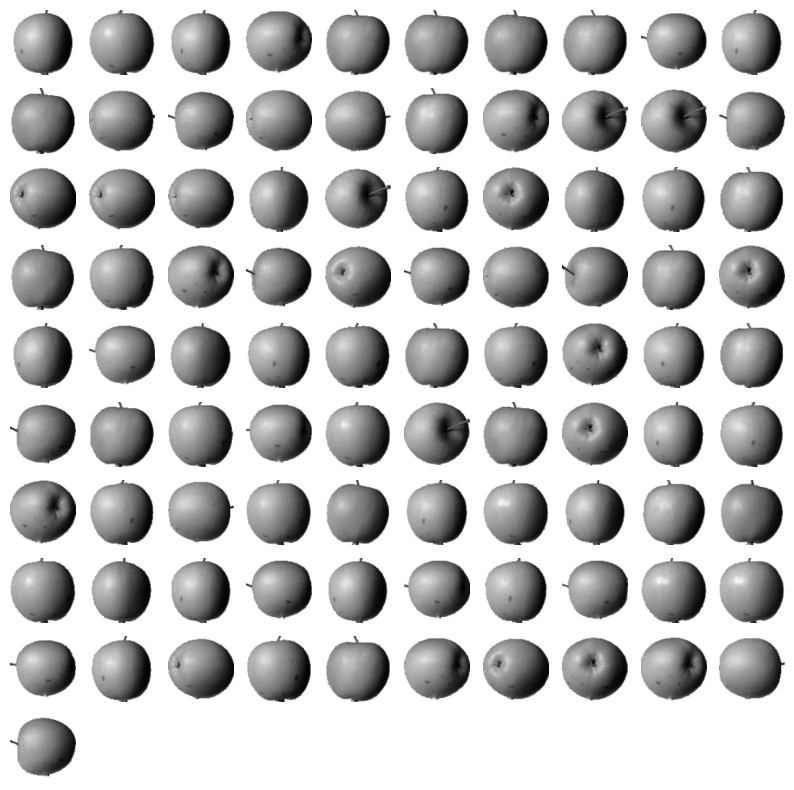

In [ ]:
for label in range(0, 3):
  draw_fruits(fruits[km.labels_==label])
  print("\n")

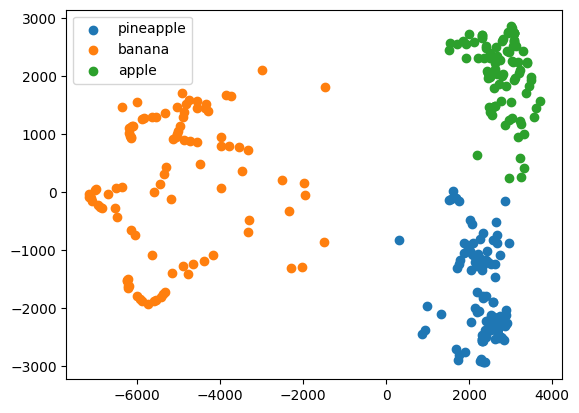

In [ ]:
# 훈련 data의 차원을 줄이면 또 하나 얻을 수 있는 장점은 시각화가 가능하다
# 3개 이하로 차원을 줄이면 화면에 출력하기 비교적 쉽다
# fruits_pca data가 2개의특성으로 있기 때문에 2차원으로 표현 가능하다

for label in range(0, 3):
  data = fruits_pca[km.labels_==label] # km.labels_를 사용해서 cluster별로 나눠서 산점도를 그려보자
  plt.scatter(data[:,0], data[:,1])
plt.legend(['pineapple','banana','apple'])
plt.show()